✅ 1. 데이터 불러오기 및 결측치 처리
고객 정보 및 거래 데이터를 불러오고, 결측치 또는 특수문자 값을 처리하세요.

파일 이름: sc_cust_info_txn_v1.5.csv

_, NaN 등 이상치/결측값을 적절히 처리

전처리된 데이터프레임을 df에 저장하세요.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [76]:
df = pd.read_csv('sc_cust_info_txn_v1.5.csv')
df = df.replace({'_':np.nan})
df = df.dropna()
df.isnull().sum()
df['age'] = df['age'].astype(int)

In [77]:
df.head()

,base_ym,dpro_tgt_perd_val,cust_ctg_type,cust_class,sex_type,age,efct_svc_count,dt_stop_yn,npay_yn,r3m_avg_bill_amt,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,termination_yn
0,202006,20200630,10001,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,0.0,0.0,Y
2,202006,20200630,10001,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,0.0,6981.0,N
3,202006,20200630,10001,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,0.0,6508.8,N
4,202006,20200630,10001,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,0.0,4507.7,N
5,202006,20200630,10001,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,1123.5,0.0,N


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8228 entries, 0 to 9929
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   base_ym             8228 non-null   int64  
 1   dpro_tgt_perd_val   8228 non-null   int64  
 2   cust_ctg_type       8228 non-null   int64  
 3   cust_class          8228 non-null   object 
 4   sex_type            8228 non-null   object 
 5   age                 8228 non-null   int64  
 6   efct_svc_count      8228 non-null   int64  
 7   dt_stop_yn          8228 non-null   object 
 8   npay_yn             8228 non-null   object 
 9   r3m_avg_bill_amt    8228 non-null   float64
 10  r3m_A_avg_arpu_amt  8228 non-null   float64
 11  r3m_B_avg_arpu_amt  8228 non-null   float64
 12  r6m_A_avg_arpu_amt  8228 non-null   float64
 13  r6m_B_avg_arpu_amt  8228 non-null   float64
 14  termination_yn      8228 non-null   object 
dtypes: float64(5), int64(5), object(5)
memory usage: 1.0+ MB


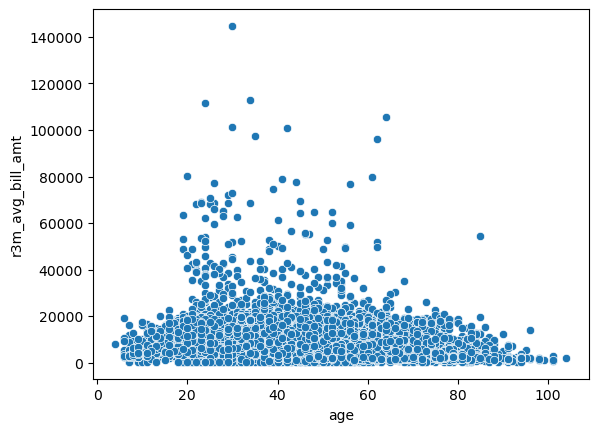

In [79]:
plt.figure()
sns.scatterplot(data=df,x = 'age',y = 'r3m_avg_bill_amt')
#sns.boxplot(data='df',x = 'sex_type',y='r3m_avg_bill_amt')
#df['sex_type'].plot(kind='hist')
#sns.countplot(data=df,x = 'sex_type')
plt.show()

In [80]:
def removeOutlier(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    ltr = 1.5 * (q3 - q1)
    y = x[(x[column] < q3 + ltr) & (x[column] > q1 - ltr)]
    

    return y
df = removeOutlier(df,'r3m_avg_bill_amt')

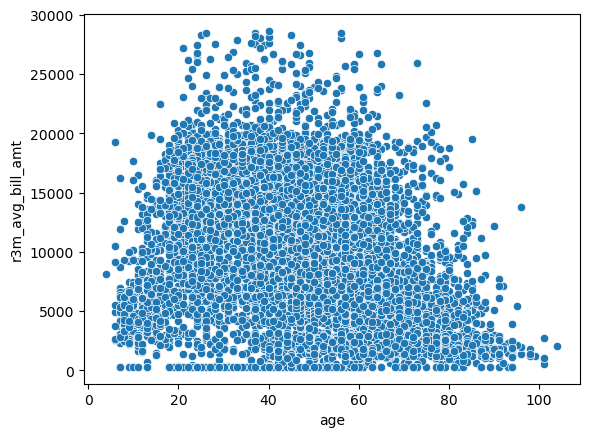

In [81]:
plt.figure()
sns.scatterplot(data=df,x = 'age',y = 'r3m_avg_bill_amt')
#sns.boxplot(data='df',x = 'sex_type',y='r3m_avg_bill_amt')
#df['sex_type'].plot(kind='hist')
#sns.countplot(data=df,x = 'sex_type')
plt.show()


✅ 2. 종속변수 선정
우리는 고객의 최근 3개월 평균 요금(r3m_avg_bill_amt)을 예측하는 모델을 만들려고 합니다.

r3m_avg_bill_amt를 종속변수 y로 지정하세요.

그 외 설명변수(X)를 수치형 + 범주형 조합으로 구성하세요.

범주형 예시: sex_type, age, cust_class 등

In [82]:
df.columns
X = df.drop(columns=['r3m_avg_bill_amt'])
y = df['r3m_avg_bill_amt']

✅ 3. 라벨 인코딩 / 원핫 인코딩
범주형 변수들을 머신러닝 모델 학습을 위해 인코딩하세요.

cust_class, sex_type, age, dt_stop_yn, npay_yn, termination_yn 등을 인코딩하세요.

pd.get_dummies(..., drop_first=True) 또는 LabelEncoder 활용

결과를 X_encoded에 저장하세요.

In [83]:
df_1 = pd.get_dummies(data=X,columns=['sex_type','cust_class','dt_stop_yn','npay_yn','termination_yn'],dtype=int)
new_df = pd.concat([X,df_1],axis=1)
new_df.columns

new_df.head()
X_encoded = new_df.drop(columns=['sex_type','cust_class','dt_stop_yn','npay_yn','termination_yn'])
X_encoded.head()


,base_ym,dpro_tgt_perd_val,cust_ctg_type,age,efct_svc_count,r3m_A_avg_arpu_amt,r3m_B_avg_arpu_amt,r6m_A_avg_arpu_amt,r6m_B_avg_arpu_amt,base_ym,...,cust_class_E,cust_class_F,cust_class_G,cust_class_H,dt_stop_yn_N,dt_stop_yn_Y,npay_yn_N,npay_yn_Y,termination_yn_N,termination_yn_Y
0,202006,20200630,10001,28,0,792.00000,1584.0000,0.0,0.0,202006,...,0,0,0,0,1,0,1,0,0,1
2,202006,20200630,10001,24,1,2526.00000,6983.0000,0.0,6981.0,202006,...,1,0,0,0,1,0,1,0,1,0
3,202006,20200630,10001,32,1,2331.71001,6750.4666,0.0,6508.8,202006,...,0,1,0,0,1,0,1,0,1,0
4,202006,20200630,10001,18,1,0.00000,4502.0000,0.0,4507.7,202006,...,0,0,0,0,1,0,1,0,1,0
5,202006,20200630,10001,78,1,1173.99990,0.0000,1123.5,0.0,202006,...,0,0,0,0,1,0,1,0,1,0


✅ 4. 학습/검증 데이터 분리
데이터셋을 학습/검증용으로 분리하세요.

train_test_split을 사용하세요.

test 사이즈는 30%, random_state=42로 설정

결과를 X_train, X_test, y_train, y_test로 저장하세요.

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

✅ 5. 스케일링
설명변수(X)에 대해 MinMaxScaler를 적용하세요.

MinMaxScaler()를 이용하여 X_train, X_test를 스케일링하세요.

결과를 X_train_scaled, X_test_scaled에 저장하세요.



In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


✅ 6. 의사결정나무 모델 학습
의사결정나무(DecisionTreeRegressor)를 학습시키세요.

하이퍼파라미터:

max_depth=4

min_samples_leaf=5

random_state=100

모델명을 dt로 설정하고 학습시키세요.

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 4,
                           min_samples_leaf = 5,
                           random_state = 100)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=100)

✅ 7. 랜덤포레스트 모델 학습
랜덤포레스트(RandomForestRegressor) 모델을 학습시키세요.

하이퍼파라미터:

n_estimators=100

max_depth=4

min_samples_leaf=5

random_state=100

모델명을 rf로 설정하고 학습시키세요.

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           max_depth = 4,
                           min_samples_leaf = 5,
                           random_state = 100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, random_state=100)

✅ 8. 예측 수행
각 모델을 사용하여 검증 데이터셋에 대한 예측을 수행하세요.

dt.predict() 결과는 y_pred_dt에 저장

rf.predict() 결과는 y_pred_rf에 저장

In [88]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

✅ 9. 성능 평가 (MSE)
각 모델의 예측 성능을 평균제곱오차(MSE)로 평가하세요.

mean_squared_error()를 사용하세요.

결과를 각각 dt_mse, rf_mse에 저장하고 출력하세요.



In [89]:
from sklearn.metrics import mean_squared_error
dt_mse = mean_squared_error(y_test,y_pred_dt)
rf_mse = mean_squared_error(y_test,y_pred_rf)
print(dt_mse)
print(rf_mse)

7620271.085949253
6659142.3883517245


✅ 10. 성능 평가 (MAE)
각 모델의 예측 성능을 평균절대오차(MAE)로 평가하세요.

mean_absolute_error()를 사용하세요.

결과를 각각 dt_mae, rf_mae에 저장하고 출력하세요.

In [90]:
from sklearn.metrics import mean_absolute_error
dt_mae = mean_absolute_error(y_test,y_pred_dt)
rf_mae = mean_absolute_error(y_test,y_pred_rf)
print(dt_mae)
print(rf_mae)

1866.3559614967573
1702.275132717981


✅ 11. 중요 변수 시각화
랜덤포레스트 모델에서 중요한 변수 10개를 시각화하세요.

rf.feature_importances_를 사용하세요.

Series로 만든 후 plot(kind='bar')

가장 중요한 변수명을 답안11에 저장하세요.

In [92]:
plt.figure()
importance = pd.Series(rf.feature_importances_,index=X.columns)
importance.plot(kind='bar')


ValueError: Length of values (32) does not match length of index (14)

<Figure size 640x480 with 0 Axes>

✅ 12. 예측값 분포 시각화
두 모델의 예측값 분포를 시각화하고, 더 안정적인 분포를 보이는 모델을 판단하세요.

y_pred_dt, y_pred_rf의 분포를 한 그래프에 hist 또는 kde로 그리세요.

더 일관된 예측 분포를 보이는 모델명을 답안12에 저장하세요.

예: 답안12 = 'randomforest'